# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

!pip install xgboost

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
visa = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

In [3]:
data = visa.copy()

<IPython.core.display.Javascript object>

In [4]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [5]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


<IPython.core.display.Javascript object>

In [6]:
data.shape

(25480, 12)

<IPython.core.display.Javascript object>

In [7]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

In [9]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

## Observation:

1. There are 25480 unique case_id.
2. Top most continent with more number of applicants is Asia.
3. Maximum number of applicants had a Bachelors degree .
4. There is a negative value in the number of employees column which need to be taken care of in the data processing.
5. Maximum number of applicants are applying for Jobs in the Northeast part.



#### Number of employees column negative values are converted to absolute values

In [10]:
data.loc[data["no_of_employees"] < 0].shape

(33, 12)

<IPython.core.display.Javascript object>

In [11]:
data["no_of_employees"] = abs(data["no_of_employees"])

<IPython.core.display.Javascript object>

In [12]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

<IPython.core.display.Javascript object>

In [13]:
# checking the number of unique values
data["case_id"].nunique()

25480

<IPython.core.display.Javascript object>

In [14]:
data.drop(["case_id"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Univariate Analysis

In [15]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [17]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [18]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    for bar in ax.patches:
        width = bar.get_width()
        height = bar.get_height()
        x, y = bar.get_xy()
        ax.text(
            x + width / 2, y + height / 2, f"{height:.1%}", ha="center", va="center"
        )

    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


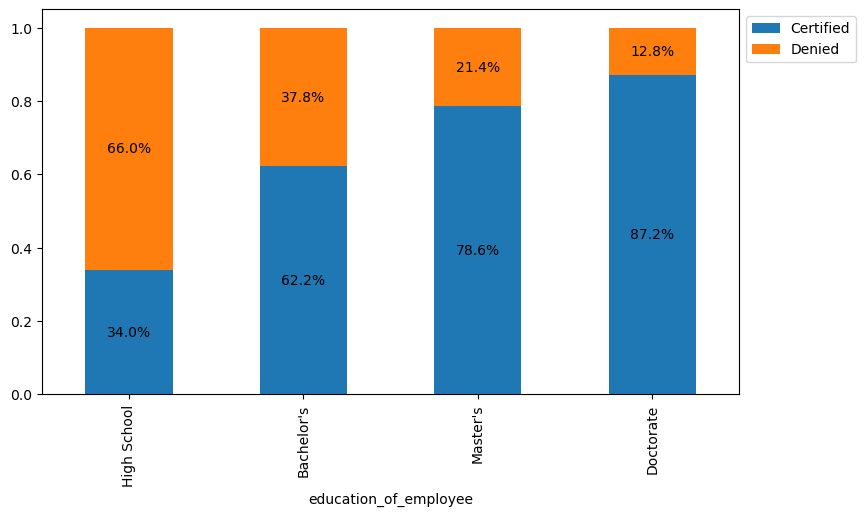

<IPython.core.display.Javascript object>

In [19]:
# Question No: 1
stacked_barplot(data, "education_of_employee", "case_status")

## Observation:
Education of the employee matters most in the case getting approved. As doctorates are having the most positive response of being certified a Visa.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


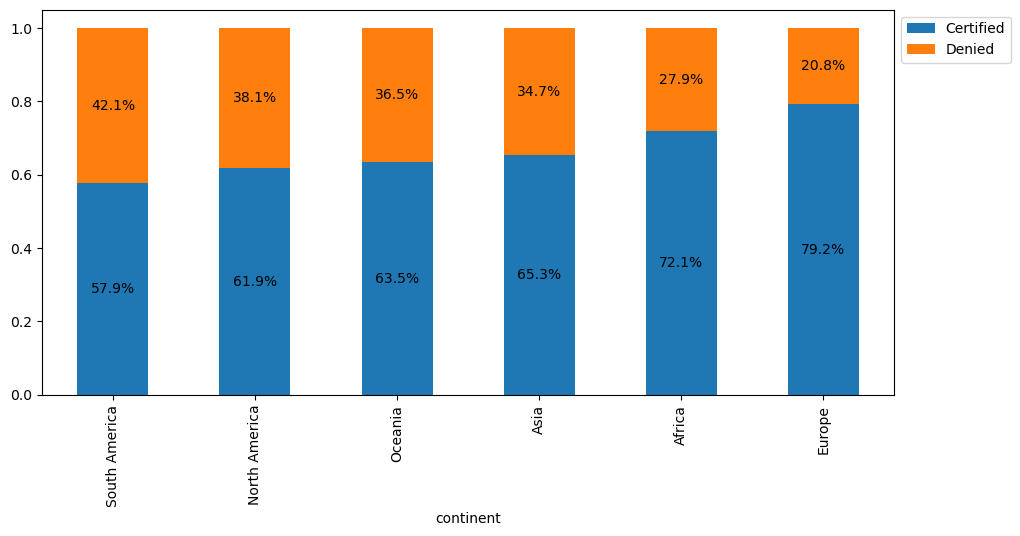

<IPython.core.display.Javascript object>

In [20]:
# Question No: 2
stacked_barplot(data, "continent", "case_status")

## Observation:

Europe has the highest level(80%) of Visa approvals. Africa and Asia are in the second and third positions in the rate of Visa approvals.South America being at the last with 57% approvals.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


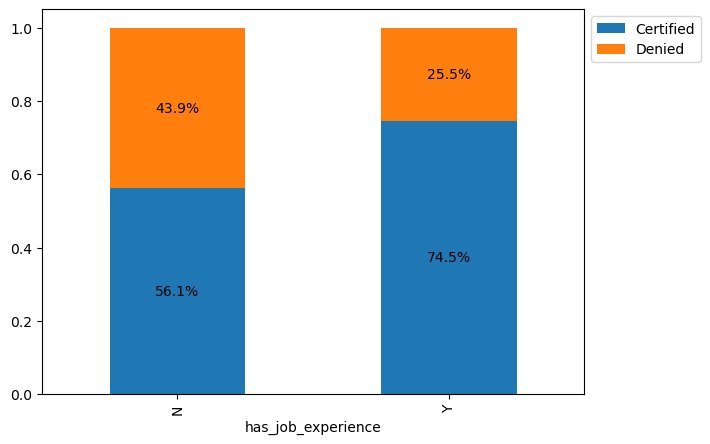

<IPython.core.display.Javascript object>

In [21]:
# Question No: 3
stacked_barplot(data, "has_job_experience", "case_status")

## Observation:
75% of employees who have job experience were certified. However, only 56% of employees without any job experience were certified. Having said that, having a prior job experince has a positive impact n getting visa certification in the USA.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


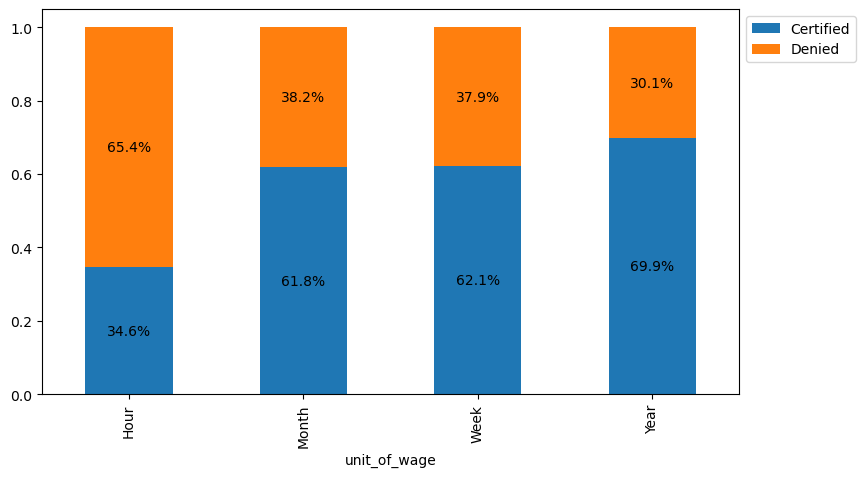

<IPython.core.display.Javascript object>

In [22]:
# Question No: 4
stacked_barplot(data, "unit_of_wage", "case_status")

## Observation:
Candidates having a Yearly pay as unit of wage are having more Visa certification.

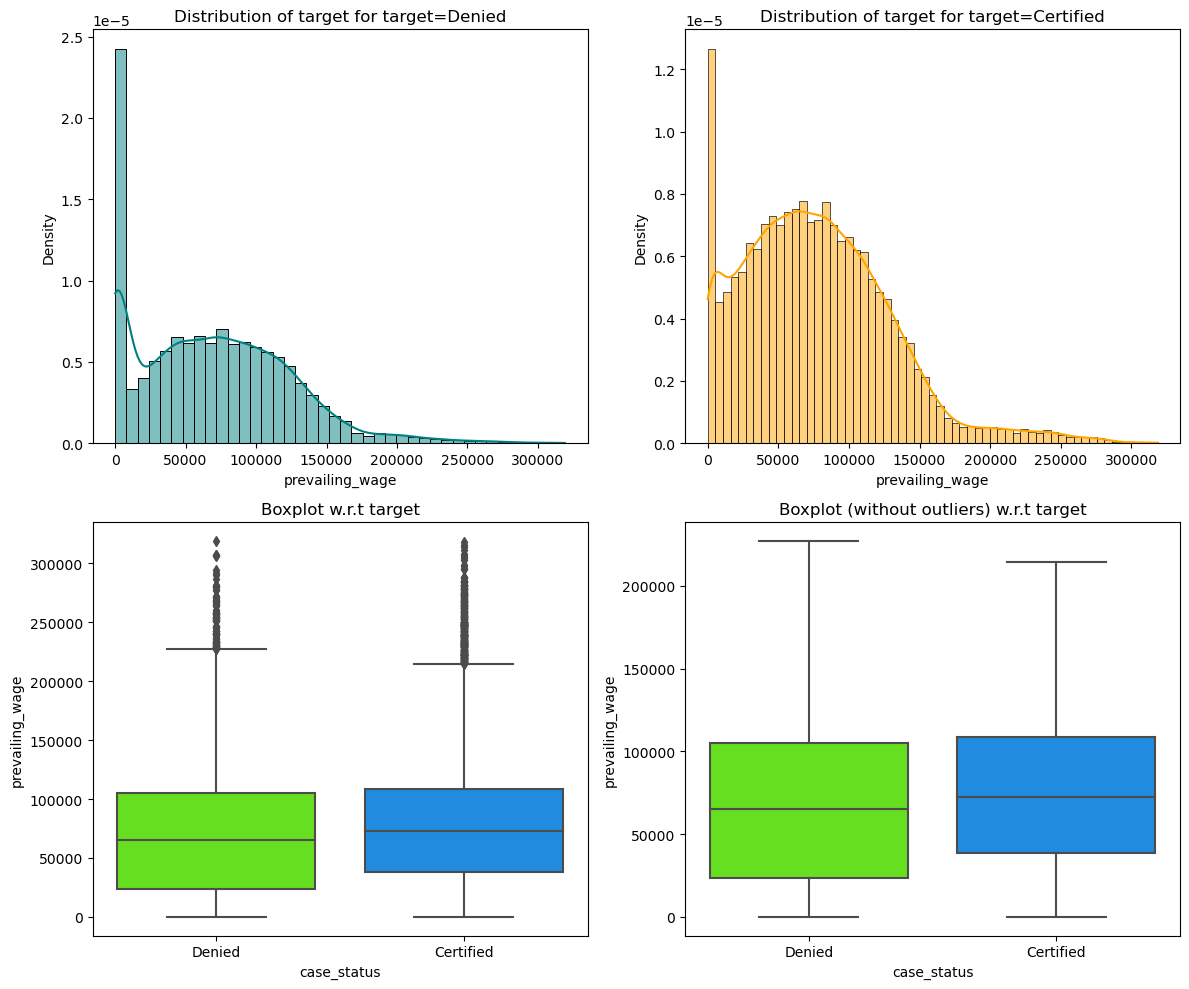

<IPython.core.display.Javascript object>

In [23]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

## Observation:
The Mean prewailing wage of Certified candidates is little higher than the Denied candidates. And the prewailing eage range between 50k to 100k

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

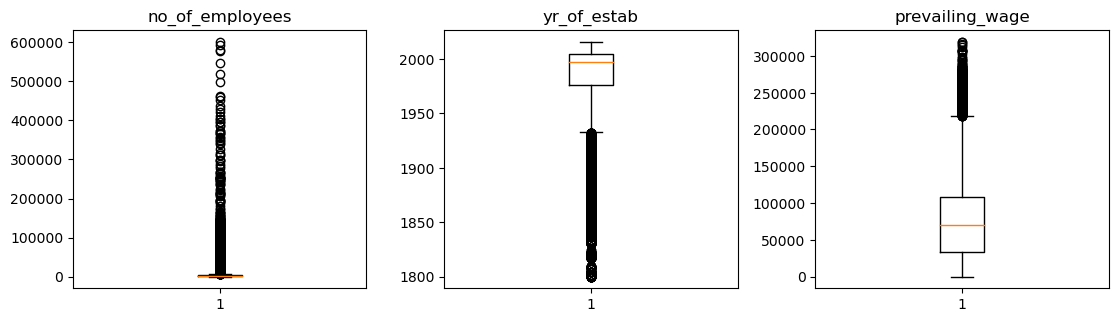

<IPython.core.display.Javascript object>

In [24]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Observation:
There are outliers in the data. Since they are real datas we are not modifying anything here.

## EDA

- It is a good idea to explore the data once again after manipulating it.

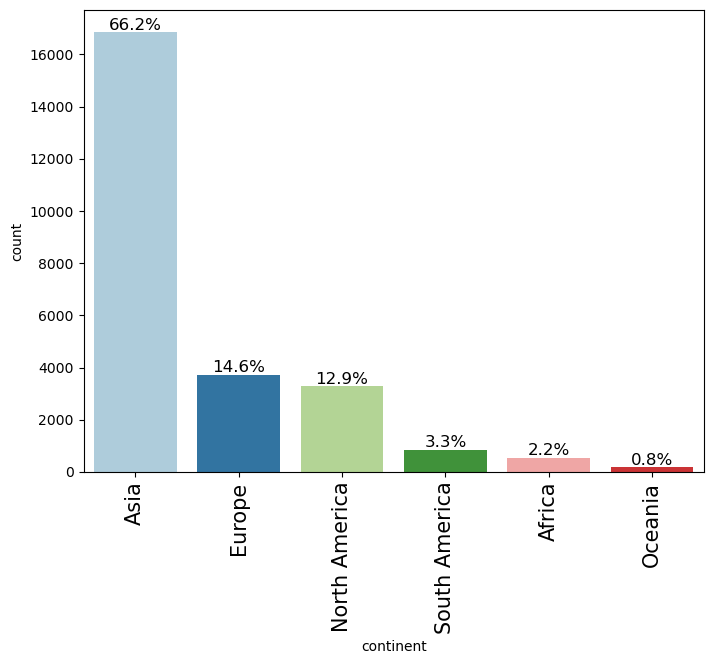

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(data, "continent", perc=True)

## Observation:
66.2 % of the applications are coming from Asia. Europe is the second top in the list.

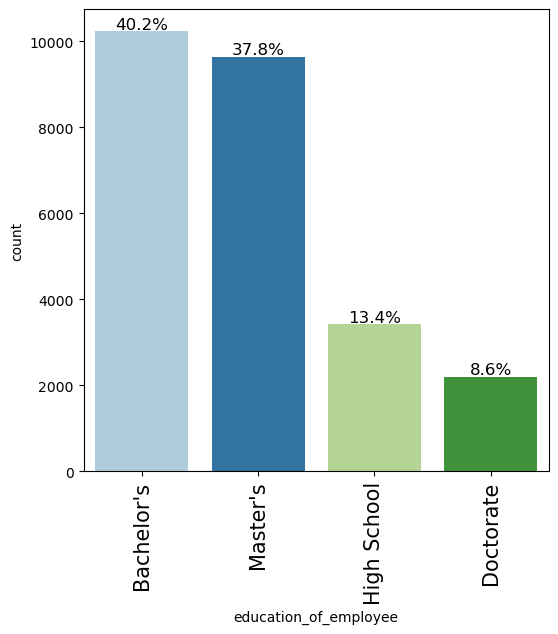

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(data, "education_of_employee", perc=True)

## Observation:
Compared to all applications, 40% of them are from a Bachelors degree candidate and then 37.8% of them are from Masters degree

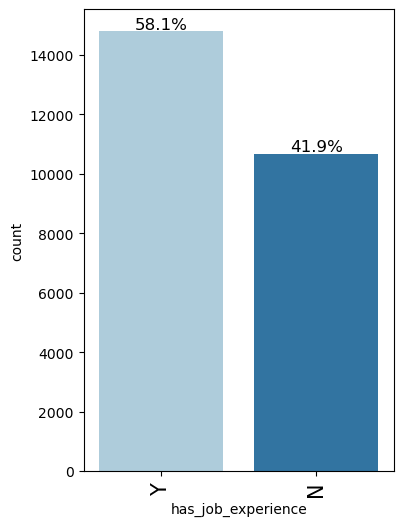

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(data, "has_job_experience", perc=True)

## Observation:
58.1% of the people applying have prior job experience.

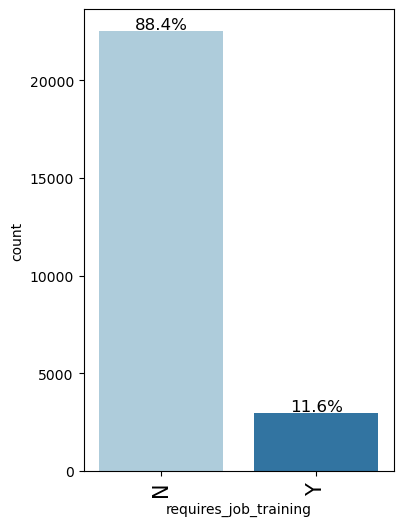

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(data, "requires_job_training", perc=True)

## Observation:
88.4 % of the people applying donot need Job training.

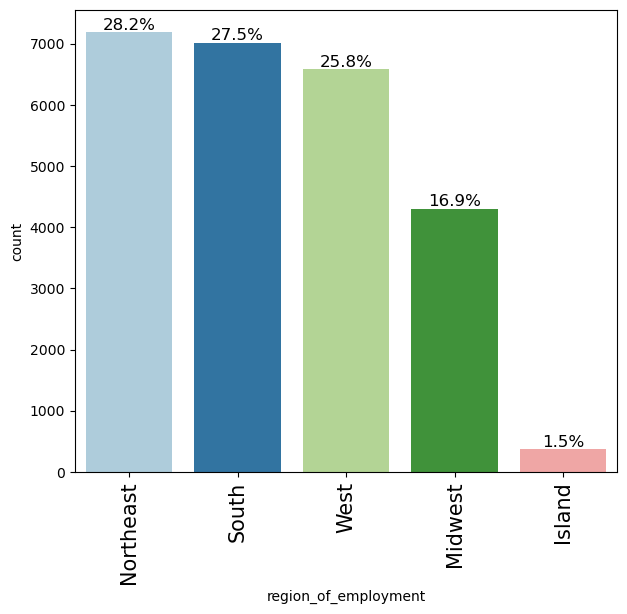

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(data, "region_of_employment", perc=True)

## Observation:
28.2% of the applications are for the Jobs in Northeast of USA.27% of the  job applicatons are to the South of USA

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


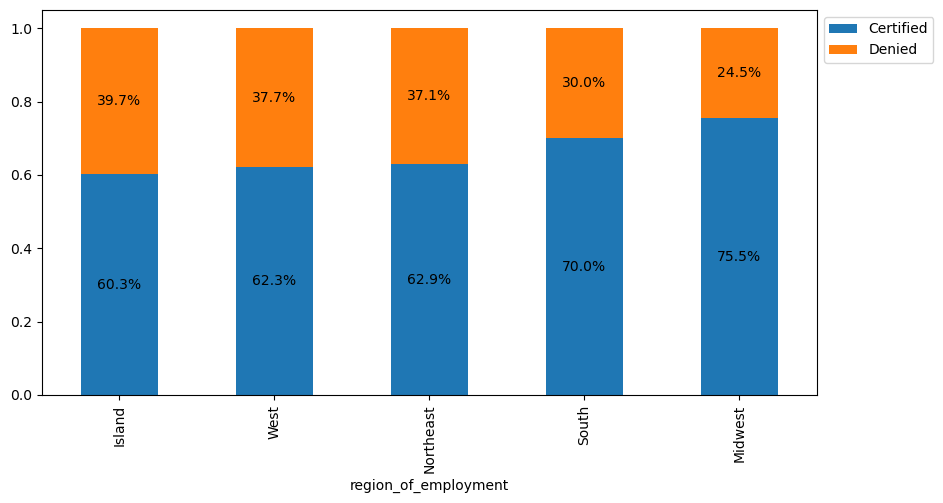

<IPython.core.display.Javascript object>

In [30]:
stacked_barplot(data, "region_of_employment", "case_status")

## Observations:
Midwest is the region where most of the Visa applications are getting approved.

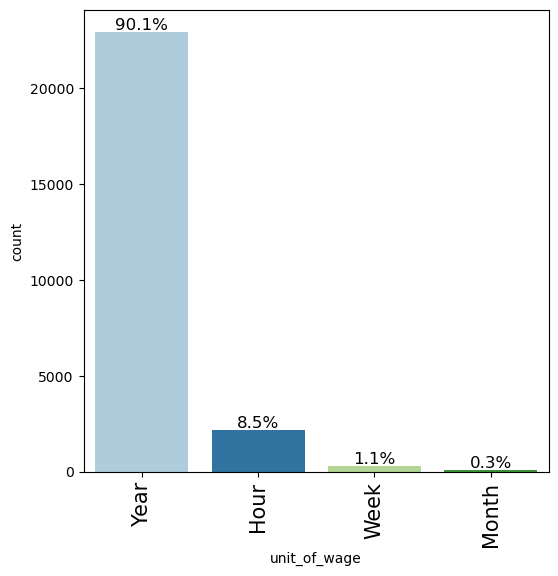

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(data, "unit_of_wage", perc=True)

## Observation:
90.1% of the applications Visa applications have unit of wage as yearly.


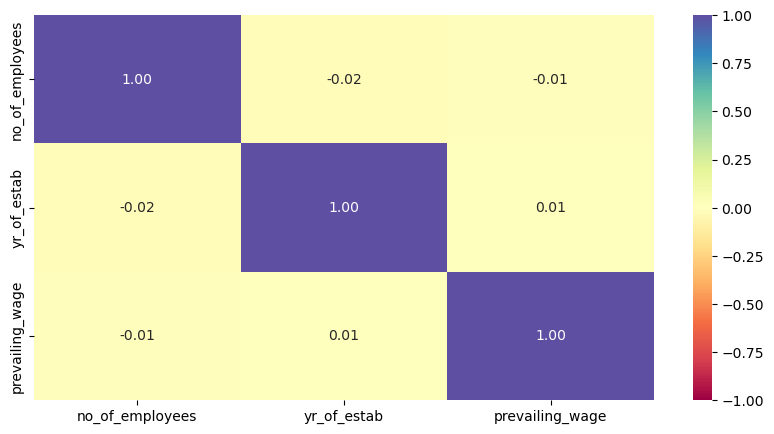

<IPython.core.display.Javascript object>

In [32]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

## Observation:
There are no correlations found in the above heatmap.

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


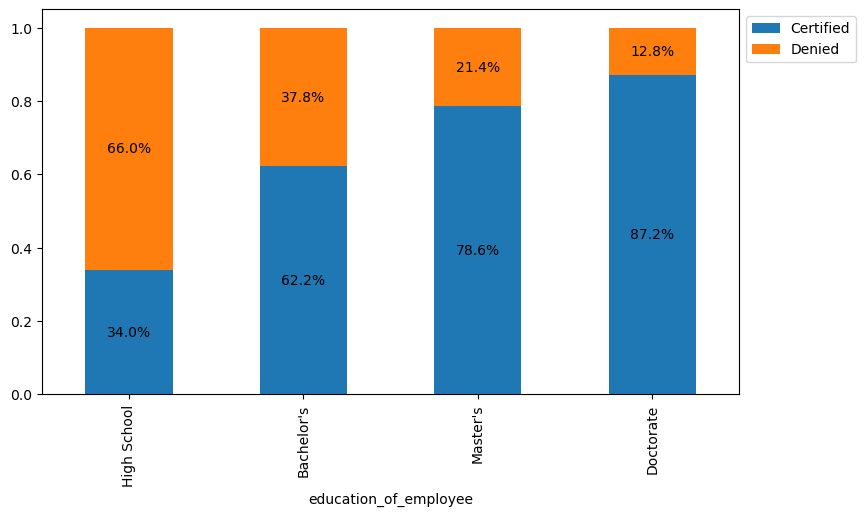

<IPython.core.display.Javascript object>

In [33]:
stacked_barplot(data, "education_of_employee", "case_status")

## Observation:
As per the above plot, higher the qualification, higher is the probability of getting Visa certified.

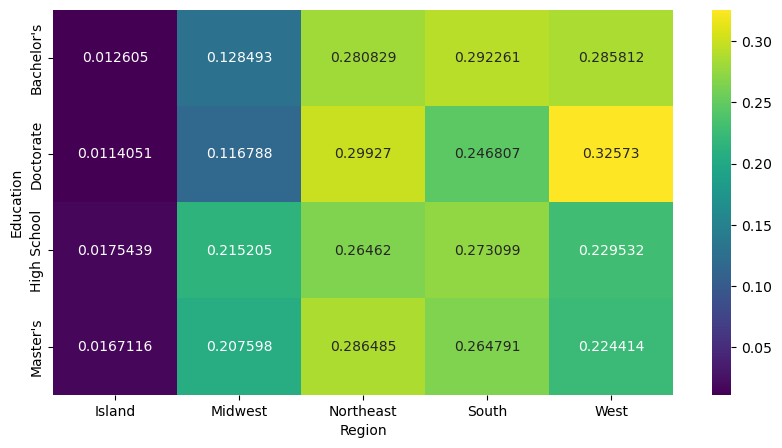

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(
        data["education_of_employee"], data["region_of_employment"], normalize="index"
    ),
    annot=True,
    fmt="g",
    cmap="viridis",
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

## Observation:
29% of the bachelors degree candidates are applying to South and West part of USA.
32% of the Doctorates are applying to West.
27% of the Highschool candidates are applying to South.
29& of the Masters candidates are applying to Northeast region.


case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


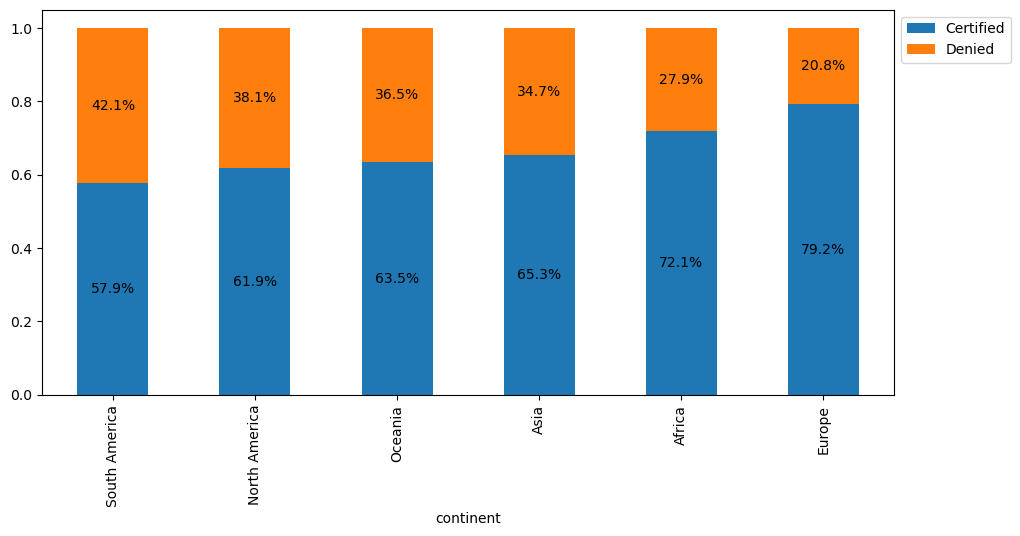

<IPython.core.display.Javascript object>

In [35]:
stacked_barplot(data, "continent", "case_status")

## Observation:
Asia, Africa and Europe have more Visa certifications than other continents. Europe being at the top in getting approvals.

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


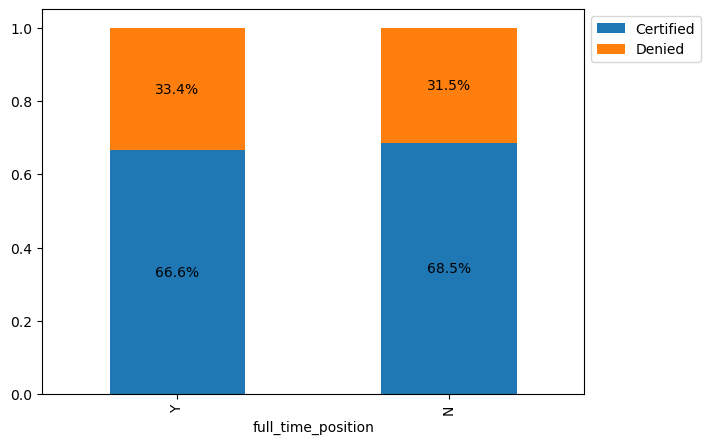

<IPython.core.display.Javascript object>

In [36]:
stacked_barplot(data, "full_time_position", "case_status")

## Observation:
Being a Full time or a parttime position doesnot affect the Visa certification approval.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


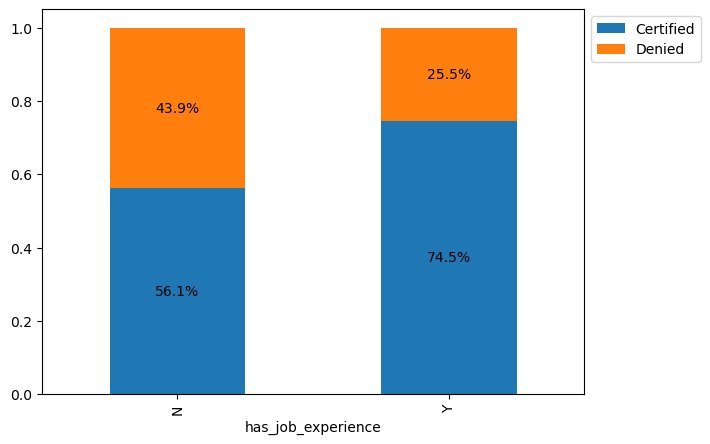

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(data, "has_job_experience", "case_status")

## Observations:
More percentage of Visa applications certified are persons having Job Experience.

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


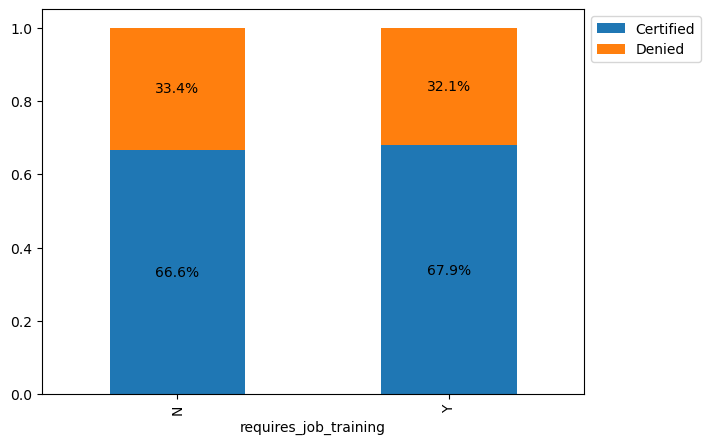

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(data, "requires_job_training", "case_status")

## Observations:
Visa certifications donot depend on requirement on Job Training.

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


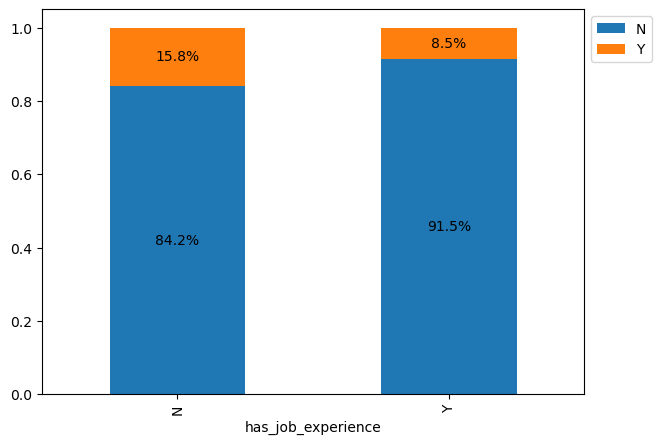

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(data, "has_job_experience", "requires_job_training")

## Observation:
Candidates without Job Experience may need Job training. 

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


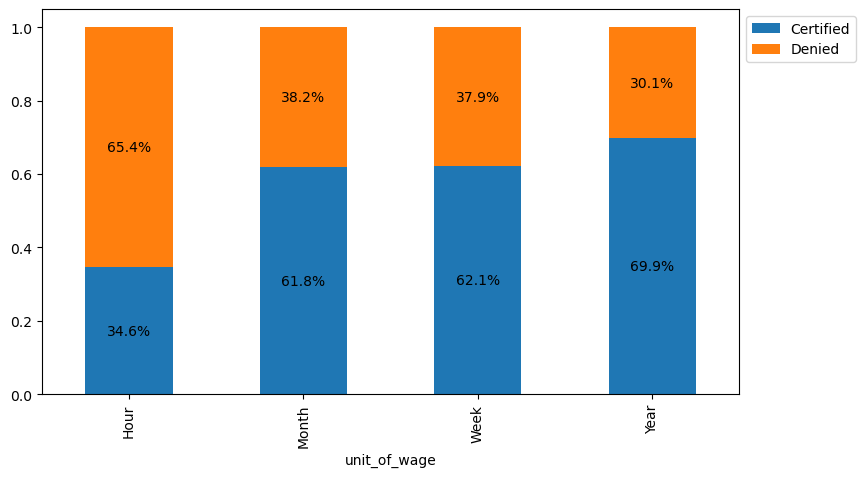

<IPython.core.display.Javascript object>

In [40]:
stacked_barplot(data, "unit_of_wage", "case_status")

## Observation:
Yearly wage is the unit of wage that has the maximum percentage of approved Visa status.

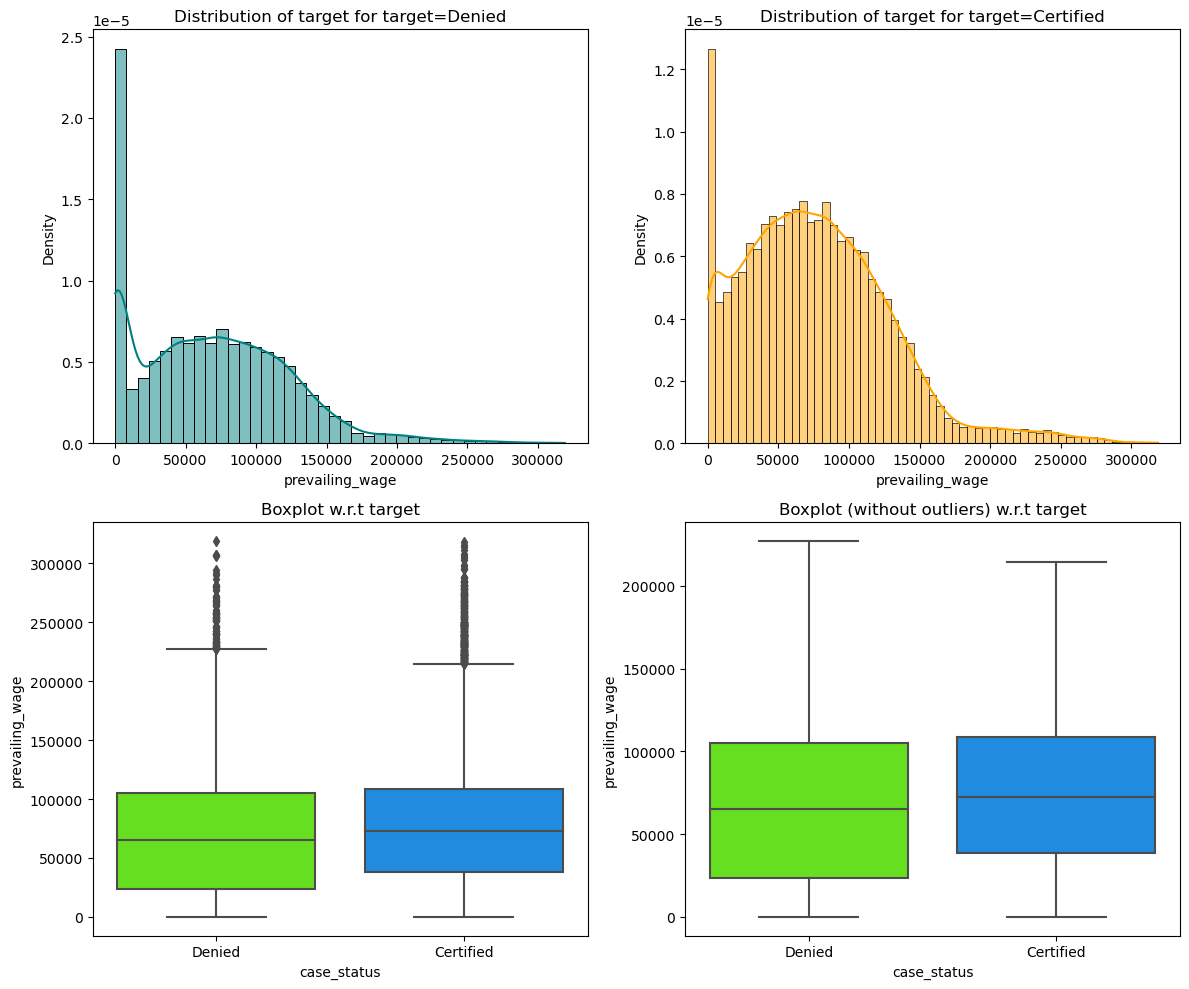

<IPython.core.display.Javascript object>

In [41]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

## Observation:

Prewailing wages for approved and denied Visa applications are almost in the same bracket. However Mean of approved visa is little over the denied applications. Most of the candidates are having a salary range from 50k to 100k dollars.

## Building bagging and boosting models

In [42]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop("case_status", axis=1)
Y = data["case_status"]


X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
X.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,2007,592.2029,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,2412,2002,83425.6500,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
2,44444,2008,122996.8600,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,98,1897,83434.0300,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,1082,2005,149907.3900,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1


<IPython.core.display.Javascript object>

In [43]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [44]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [45]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Decision Tree - Model Building and Hyperparameter Tuning


In [46]:
model = DecisionTreeClassifier(random_state=1) 
model.fit(X_train,y_train)


DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

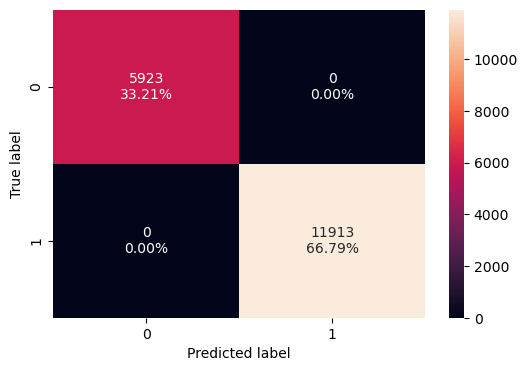

<IPython.core.display.Javascript object>

In [47]:
confusion_matrix_sklearn(model, X_train, y_train)

In [48]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Checking model performance on testing set

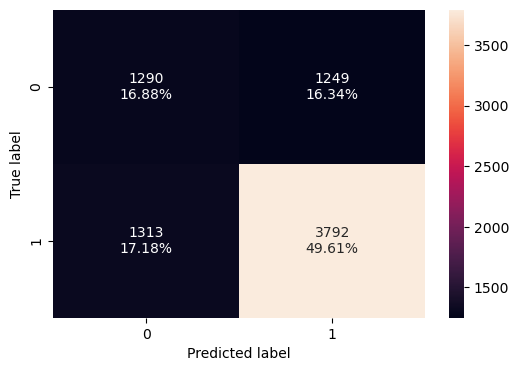

<IPython.core.display.Javascript object>

In [49]:
confusion_matrix_sklearn(
    model, X_test, y_test
)  ## Complete the code to create confusion matrix for test data

In [50]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


<IPython.core.display.Javascript object>

* The decision tree is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - Decision Tree

In [51]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 4, 7],
    "max_leaf_nodes": [10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, random_state=1)

<IPython.core.display.Javascript object>

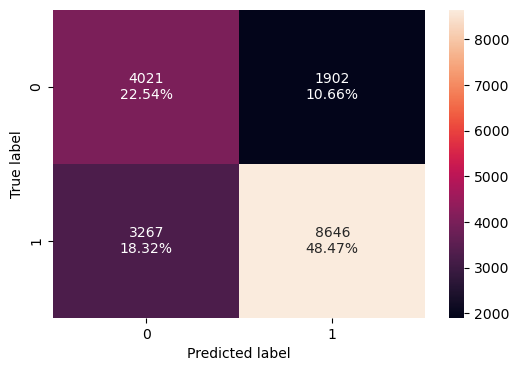

<IPython.core.display.Javascript object>

In [52]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [53]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.710193,0.725762,0.819681,0.769868


<IPython.core.display.Javascript object>

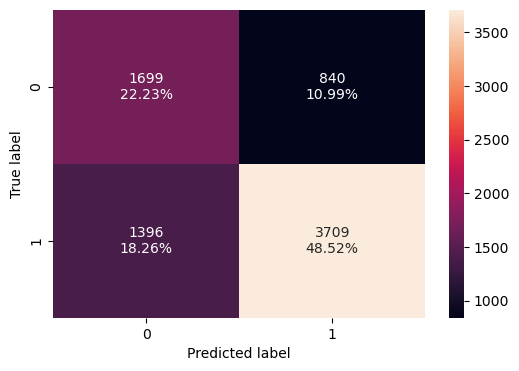

<IPython.core.display.Javascript object>

In [54]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [55]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.707483,0.726543,0.815344,0.768386


<IPython.core.display.Javascript object>

* The overfitting has reduced but the test f1-score has also decreased.
* Let's try some other models.

## Bagging - Model Building and Hyperparameter Tuning

In [56]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [57]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
print(bagging_classifier_model_train_perf)

   Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887


<IPython.core.display.Javascript object>

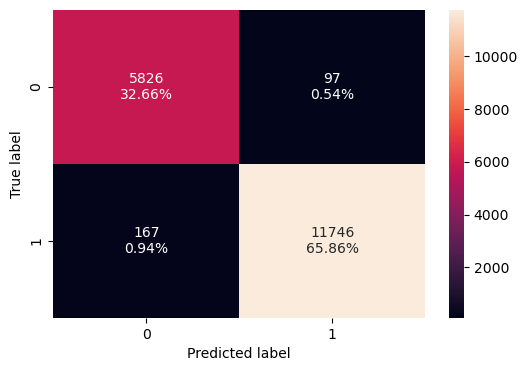

<IPython.core.display.Javascript object>

In [58]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

#### Checking model performance on test set

In [59]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
print(bagging_classifier_model_test_perf)

   Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


<IPython.core.display.Javascript object>

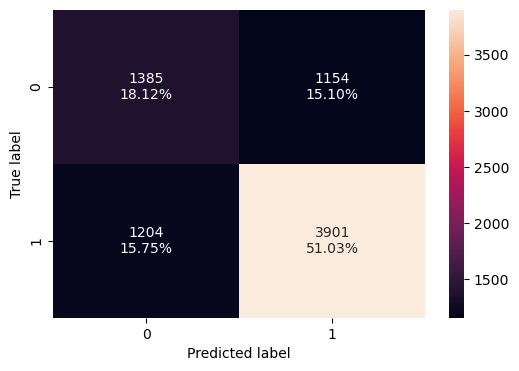

<IPython.core.display.Javascript object>

In [60]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

* Bagging classifier is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - Bagging Classifier

In [61]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": [30, 50, 70],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

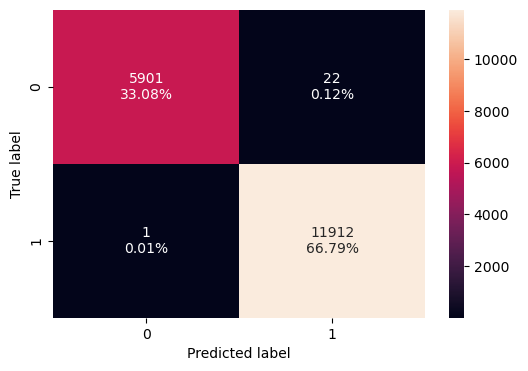

<IPython.core.display.Javascript object>

In [62]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [63]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.99871,0.999916,0.998157,0.999036


<IPython.core.display.Javascript object>

#### Checking model performance on test set

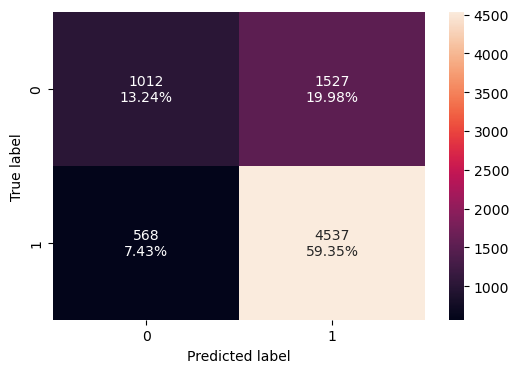

<IPython.core.display.Javascript object>

In [64]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [65]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.725929,0.888737,0.748186,0.812427


<IPython.core.display.Javascript object>

### Random Forest

In [66]:
rf_estimator = RandomForestClassifier(class_weight="balanced", random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on train set

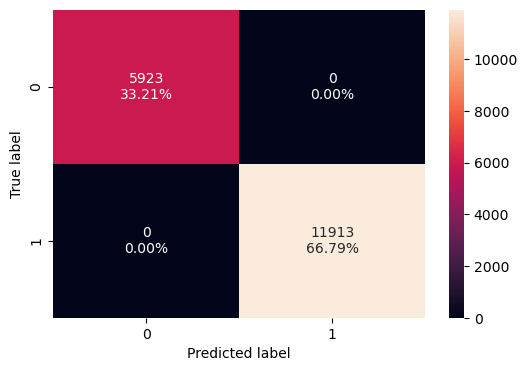

<IPython.core.display.Javascript object>

In [67]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [68]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Checking model performance on test set


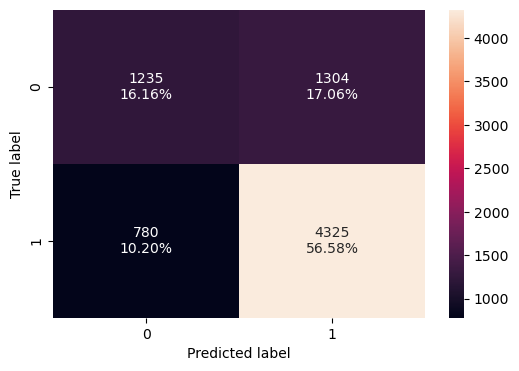

<IPython.core.display.Javascript object>

In [69]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [70]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727368,0.847209,0.768343,0.805851


<IPython.core.display.Javascript object>

### Hyperparameter Tuning

In [71]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "n_estimators": [50, 110, 25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), "sqrt"],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=110,
                       oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

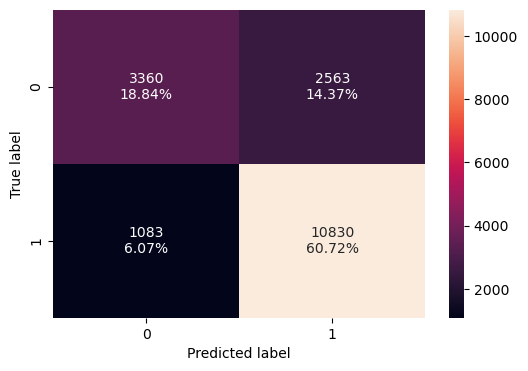

<IPython.core.display.Javascript object>

In [72]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [73]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.795582,0.909091,0.808631,0.855923


<IPython.core.display.Javascript object>

#### Checking model performance on testing set

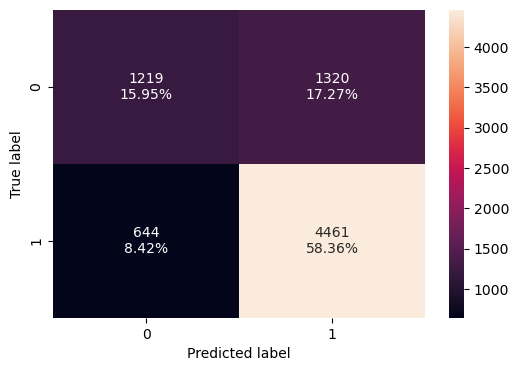

<IPython.core.display.Javascript object>

In [74]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [75]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743066,0.873849,0.771666,0.819585


<IPython.core.display.Javascript object>

## Boosting - Model Building and Hyperparameter Tuning


### AdaBoost Classifier

In [76]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

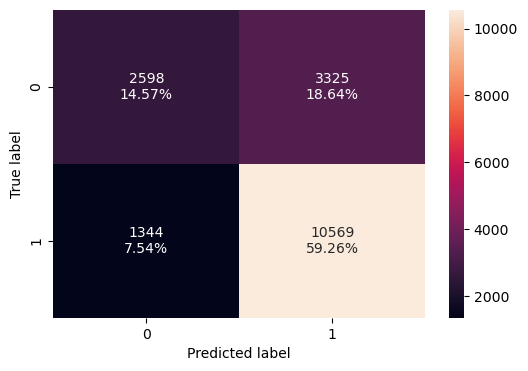

<IPython.core.display.Javascript object>

In [77]:
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [78]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


<IPython.core.display.Javascript object>

#### Checking model performance on testing set

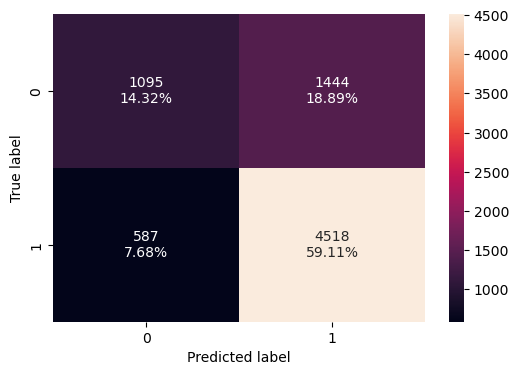

<IPython.core.display.Javascript object>

In [79]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [80]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


<IPython.core.display.Javascript object>

### Hyperparameter Tuning

In [81]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": np.arange(0.01, 0.1, 0.05),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.060000000000000005, n_estimators=100,
                   random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

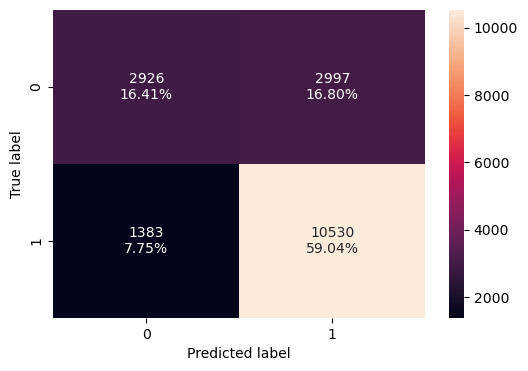

<IPython.core.display.Javascript object>

In [82]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [83]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.754429,0.883908,0.778443,0.82783


<IPython.core.display.Javascript object>

#### Checking model performance on testing set

In [84]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.741104,0.876004,0.768649,0.818823


<IPython.core.display.Javascript object>

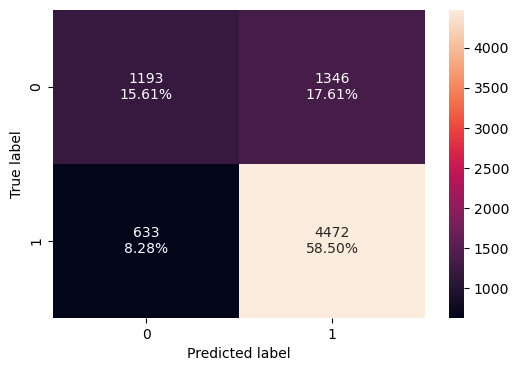

<IPython.core.display.Javascript object>

In [85]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

### Gradient Boosting Classifier

In [86]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

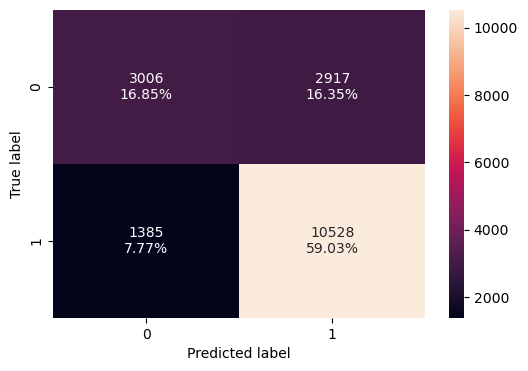

<IPython.core.display.Javascript object>

In [87]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [88]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


<IPython.core.display.Javascript object>

#### Checking model performance on testing set

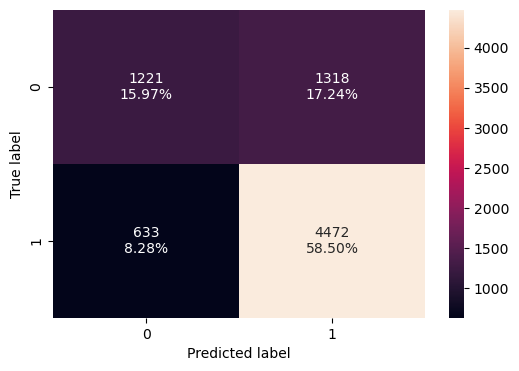

<IPython.core.display.Javascript object>

In [89]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [90]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - Gradient Boosting Classifier

In [91]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50, 110, 25),
    "subsample": [0.7, 0.9],
    "max_features": [0.5, 0.7, 1],
    "learning_rate": [0.01, 0.1, 0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.9)

<IPython.core.display.Javascript object>

#### Checking model performance on training set


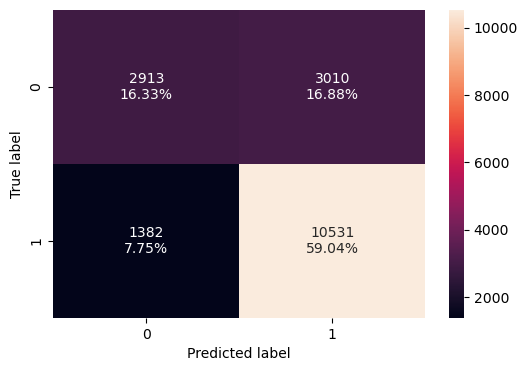

<IPython.core.display.Javascript object>

In [92]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [93]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.753756,0.883992,0.777712,0.827453


<IPython.core.display.Javascript object>

#### Checking model performance on testing set


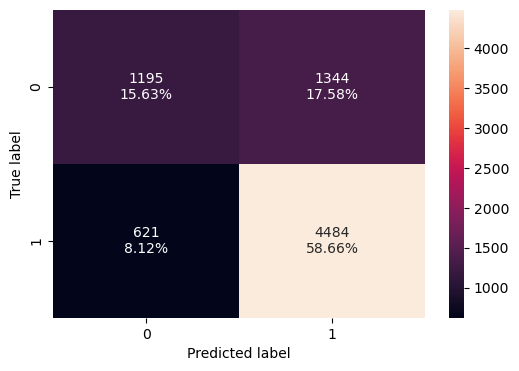

<IPython.core.display.Javascript object>

In [94]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [95]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.742936,0.878355,0.769389,0.820269


<IPython.core.display.Javascript object>

### XGBoost Classifier

In [96]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

<IPython.core.display.Javascript object>

#### Checking model performance on training set


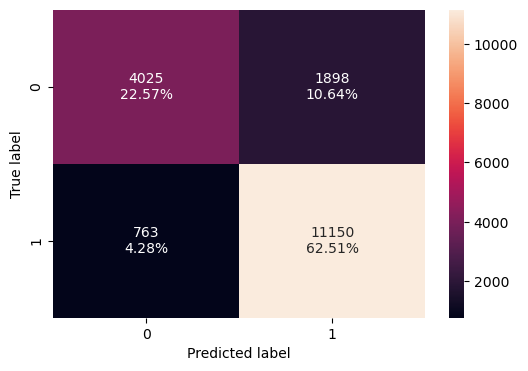

<IPython.core.display.Javascript object>

In [97]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [98]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.850807,0.935952,0.854537,0.893394


<IPython.core.display.Javascript object>

#### Checking model performance on testing set

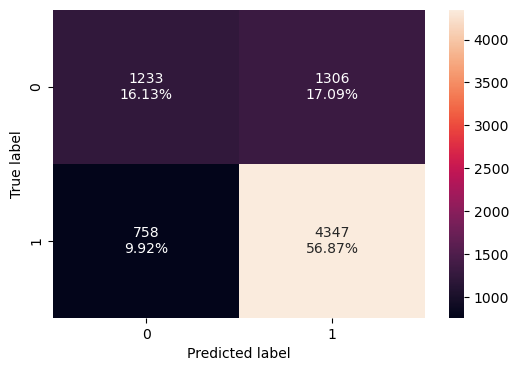

<IPython.core.display.Javascript object>

In [99]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [100]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.729984,0.851518,0.768972,0.808143


<IPython.core.display.Javascript object>

### Hyperparameter Tuning

In [101]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50, 110, 25),
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.7, 0.9],
    "learning_rate": [0.01, 0.1, 0.05],
    "gamma": [1, 3],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

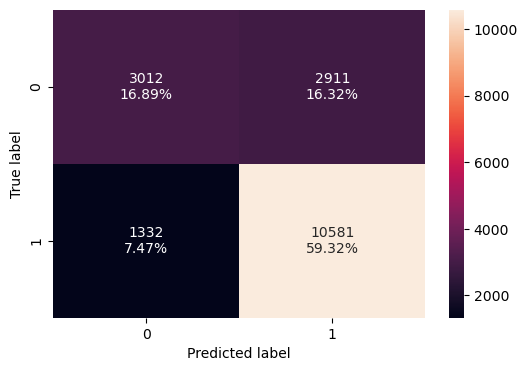

<IPython.core.display.Javascript object>

In [102]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [103]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.76211,0.888189,0.784243,0.832986


<IPython.core.display.Javascript object>

#### Checking model performance on testing set

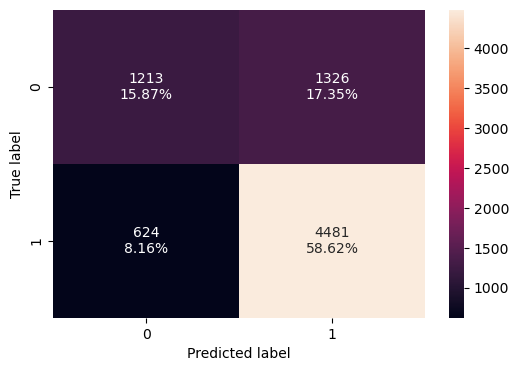

<IPython.core.display.Javascript object>

In [104]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [105]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744898,0.877767,0.771655,0.821298


<IPython.core.display.Javascript object>

## Stacking Model

In [106]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]
final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.05,
                                                           max_features=0.7,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(max_samples=0.4,
                                                       min_samples_leaf=3,
                                                       n_estimators=110,
                                                       oob_score=True,
                                                       random_stat...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

<IPython.core.display.Javascript object>

### Checking model performance on training set

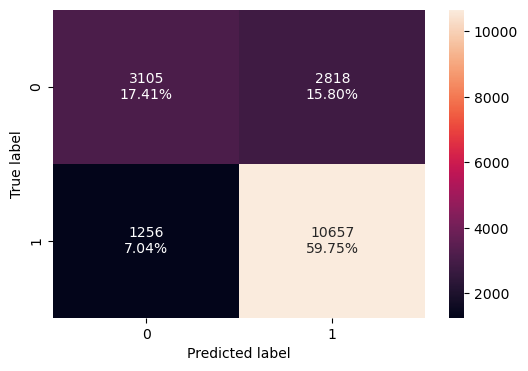

<IPython.core.display.Javascript object>

In [107]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [108]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.771586,0.894569,0.790872,0.83953


<IPython.core.display.Javascript object>

### Checking model performance on testing set


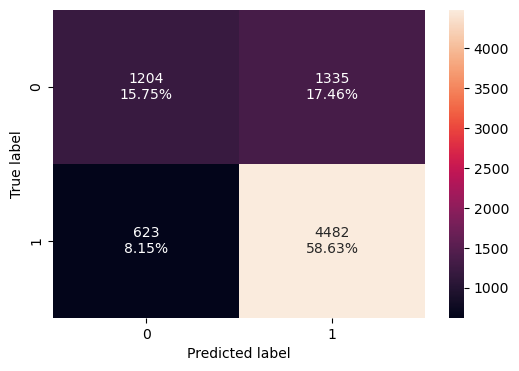

<IPython.core.display.Javascript object>

In [109]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [110]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743851,0.877963,0.7705,0.820729


<IPython.core.display.Javascript object>

##  Will tuning the hyperparameters improve the model performance?

In [111]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.710193,0.985198,0.998710,1.0,0.795582,0.738226,0.754429,0.758802,0.753756,0.850807,0.762110,0.771586
Recall,1.0,0.725762,0.985982,0.999916,1.0,0.909091,0.887182,0.883908,0.883740,0.883992,0.935952,0.888189,0.894569
Precision,1.0,0.819681,0.991810,0.998157,1.0,0.808631,0.760688,0.778443,0.783042,0.777712,0.854537,0.784243,0.790872
F1,1.0,0.769868,0.988887,0.999036,1.0,0.855923,0.819080,0.827830,0.830349,0.827453,0.893394,0.832986,0.839530


<IPython.core.display.Javascript object>

In [112]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.707483,0.691523,0.725929,0.727368,0.743066,0.734301,0.741104,0.744767,0.742936,0.729984,0.744898,0.743851
Recall,0.742801,0.726543,0.764153,0.888737,0.847209,0.873849,0.885015,0.876004,0.876004,0.878355,0.851518,0.877767,0.877963
Precision,0.752232,0.815344,0.771711,0.748186,0.768343,0.771666,0.757799,0.768649,0.772366,0.769389,0.768972,0.771655,0.770500
F1,0.747487,0.768386,0.767913,0.812427,0.805851,0.819585,0.816481,0.818823,0.820927,0.820269,0.808143,0.821298,0.820729


<IPython.core.display.Javascript object>

* The majority of the models are overfitting the training data in terms of f1-score.
* The Tuned XGboost classifier & Gradient boost classifier is giving the highest f1-score on the test data without overfitting the training data.
* Using Gradient boost classifier to get the feature importances below.


### Feature importance of Gradient boost

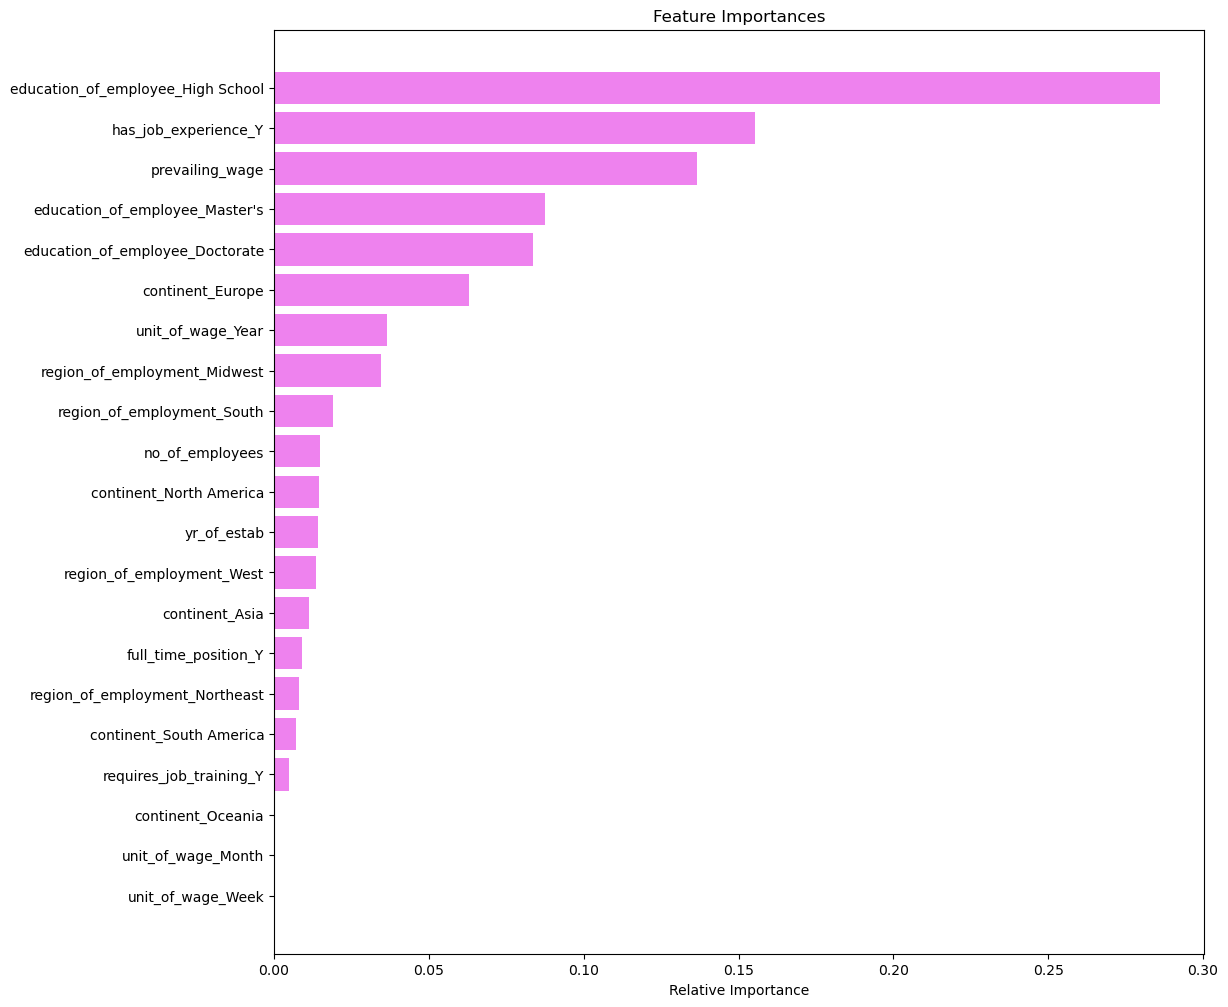

<IPython.core.display.Javascript object>

In [113]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Education of the employee having a high school degree is the most important feature in the dataset of getting Visa confirmed followed by Job experience and Prewailing wage.

## Model Performance Comparison and Conclusions

* The higher the applicant's education level is, the more their chances of visa certification.
* Having job experience increases the chances of visa approval.
* Job training requirement has a negligible effect on probability of getting a Visa.
* The visa applications for the employment in the Midwest region are more likely to be certified than the applications for the employment in other regions. South region is the second best for employment to get a approval.
* European candidates are having good probability of visa getting approved.
* Being a full- or part-time position does not observably affect the visa approval.
* The positions with the wage units of Year and Hour have the highest and the lowest chances of visa certification, respectively.
* The majority of employers applying for work visas are less than 40 years old.


## Actionable Insights and Recommendations

#### Insights:
For the Office of Foreign Labor Certification (OFLC), the three most critical components for an applicant to be selected are:

1. Education level-An applicant applying for a job requiring a high school diploma will more than likely be denied. Conversely, applications for jobs requiring a Master's degree or doctorate are very likely to be approved.
2. Prior job experience-An applicant applying for a job without any previous job experience is more likley to be denied than an applicant for a job with experience.
3. Prevailing wage-The higher the prevailing wage of the job an applicant is applying for, the more likely the application will be approved. 




#### Recommendations
Below are the few recommendations to OFLC. 
1. OFLC can sort applications by level of education and review the higher levels of education first.
2. OFLC can sort applications by previous job experience and review those with experience first.
3. Divide applications for jobs into those with an hourly wage and those with an annual wage, sort each group by the prevailing wage, then review applications for salaried jobs first from highest to lowest wage.
4. As mentioned, the Gradient Boosting classifier & Tuned XGboost performs the best of all the models created. 
5. For those in less skilled, entry-level, and/or hourly jobs, the system would appear to be biased against these applications being certified.
